In [1]:
%matplotlib inline
import nivapy3 as nivapy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import os
plt.style.use('ggplot')

# Elveovervåkingsprogrammet - average monthly temperatures

This notebook calculates average monthly temperatures for the 20 main rivers in the 2017-18 monitoring programme. Data come from a variety of sources, so the workflow is a bit messy. See e-mail from Øyvind received 04.10.2018 at 09.46 for more details. For 2017-18, it looks as though we have the following data sources:

| Station ID | Station Code |     Station Name     | Data in hydra? | NIVA TinyTag? | Manual sampling (≥ once per month) | Dataset to use |
|:----------:|:------------:|:--------------------:|:--------------:|:-------------:|:----------------------------------:|:--------------:|
|    29612   |    BUSEDRA   |     Drammenselva     |       Yes      |       No      |                 No                 |       NVE      |
|    29613   |    TELESKI   |      Skienselva      |       Yes      |      Yes      |                 No                 |     TinyTag    |
|    29614   |    VAGEOTR   |         Otra         |      (Yes)     |      Yes      |                 No                 |     TinyTag    |
|    29615   |    VESENUM   |     Numedalslågen    |      (Yes)     |      Yes      |                 No                 |     TinyTag    |
|    29617   |    ØSTEGLO   | Glomma ved Sarpsfoss |      (Yes)     |       No      |                 Yes                |     Manual     |
|    29778   |    STREORK   |         Orkla        |      (Yes)     |       No      |                 No                 |      NVE?      |
|    29779   |    FINEALT   |       Altaelva       |       No       |      Yes      |                 No                 |     TinyTag    |
|    29782   |    NOREVEF   |        Vefsna        |      (Yes)     |      Yes      |                 No                 |     TinyTag    |
|    29783   |    ROGEORR   |       Orreelva       |       No       |      Yes      |                 No                 |     TinyTag    |
|    29819   |    FINEPAS   |      Pasvikelva      |      (Yes)     |       No      |                 Yes                |     Manual     |
|    29820   |    FINETAN   |       Tanaelva       |       No       |       No      |                 Yes                |     Manual     |
|    29821   |    HOREVOS   |  Vosso(Bolstadelvi)  |       Yes      |      Yes      |                 No                 |     TinyTag    |
|    29822   |    MROEDRI   |         Driva        |       No       |       No      |                 No                 |    No data?    |
|    29832   |    ROGEBJE   |    Bjerkreimselva    |       Yes      |       No      |                 No                 |       NVE      |
|    29837   |    ROGEVIK   |     Vikedalselva     |       Yes      |       No      |                 No                 |       NVE      |
|    29842   |    SFJENAU   |        Nausta        |       Yes      |       No      |                 Yes                |   NVE/Manual   |
|    29844   |    STRENID   |   Nidelva(Tr.heim)   |       No       |       No      |                 Yes                |     Manual     |
|    29848   |    TROEMÅL   |        Målselv       |       No       |       No      |                 Yes                |     Manual     |
|    30019   |    AAGEVEG   |      Vegårdselva     |       No       |       No      |                 No                 |  Rolf's logger |
|    36225   |    OSLEALN   |         Alna         |       No       |       No      |                 Yes                |     Manual     |

**Note:** The most recent temperature data is Hydra-II is located in a slightly different place to the usual discharge series. To get to the temperature data, first start the **DAGUT** program (as usual) and click **Hent** to open the station selector window. At the top of this window, open the drop-down list and choose **HYKVAL** (second item down) then search for the station of interest. Temperature series have variable code 1003 in the database.

For 2017-18, **there is one river (29822; Driva) for which no data appear to be available**.

## 1. Get manual data from RESA2

The code below gets all the temperature data from RESA2 and calculates monthly averages.

In [2]:
# Connect to db
eng = nivapy.da.connect()

Connection successful.


In [3]:
# Find project
prj_df = nivapy.da.search_resa_projects("project_name LIKE '%lveovervåking%'", eng)
prj_df

,project_id,project_number,project_name,contact_person,project_description
0,4230,O 16384,Elveovervåkingsprogrammet,None,Videreføring av RID. Tilførsler fra elver til ...


In [4]:
stn_df = nivapy.da.select_resa_project_stations(prj_df, eng)
stn_df

,station_id,station_code,station_name,latitude,longitude,altitude
0,29612,BUSEDRA,Drammenselva,59.753995,10.008990,None
1,29615,VESENUM,Numedalslågen,59.086000,10.070000,None
2,29613,TELESKI,Skienselva,59.199000,9.611000,None
3,30019,AAGEVEG,Vegårdselva,58.669996,8.980983,None
4,29614,VAGEOTR,Otra,58.187000,7.954000,None
5,29832,ROGEBJE,Bjerkreimselva,58.478994,5.994986,None
6,29783,ROGEORR,Orreelva,58.731000,5.529000,None
7,29617,ØSTEGLO,Glomma ved Sarpsfoss,59.279802,11.134111,None
8,36225,OSLEALN,Alna,59.905091,10.791359,None
9,29837,ROGEVIK,Vikedalselva,59.499993,5.909988,None


In [5]:
# Get temp data and print number of measurements in 2017 for each site
# Loop over sites
wc_list = []
for stn_id in stn_df['station_id'].values:
    wc_df, dup_df = nivapy.da.extract_resa_water_chem(stn_id,
                                                      ['Temp',],
                                                      '2017-01-01',
                                                      '2017-12-31',
                                                      eng)
    wc_df['station_id'] = stn_id
    wc_list.append(wc_df)
    
    print ('%s\t%s' % (stn_id, len(wc_df)))

# Combine
wc_df = pd.concat(wc_list, axis=0, sort=True)

# Aggregate to monthly
wc_df['month'] = wc_df.index.month
agg = wc_df[['station_id', 'month', 'Temp_oC']].groupby(['station_id', 'month'])
mon_df = agg.mean().reset_index()

29612	12
29615	1
29613	3
30019	0
29614	0
29832	11
29783	0
29617	16
36225	12
29837	0
29821	0
29842	12
29822	11
29778	0
29844	12
29782	0
29848	12
29779	1
29820	12
29819	12


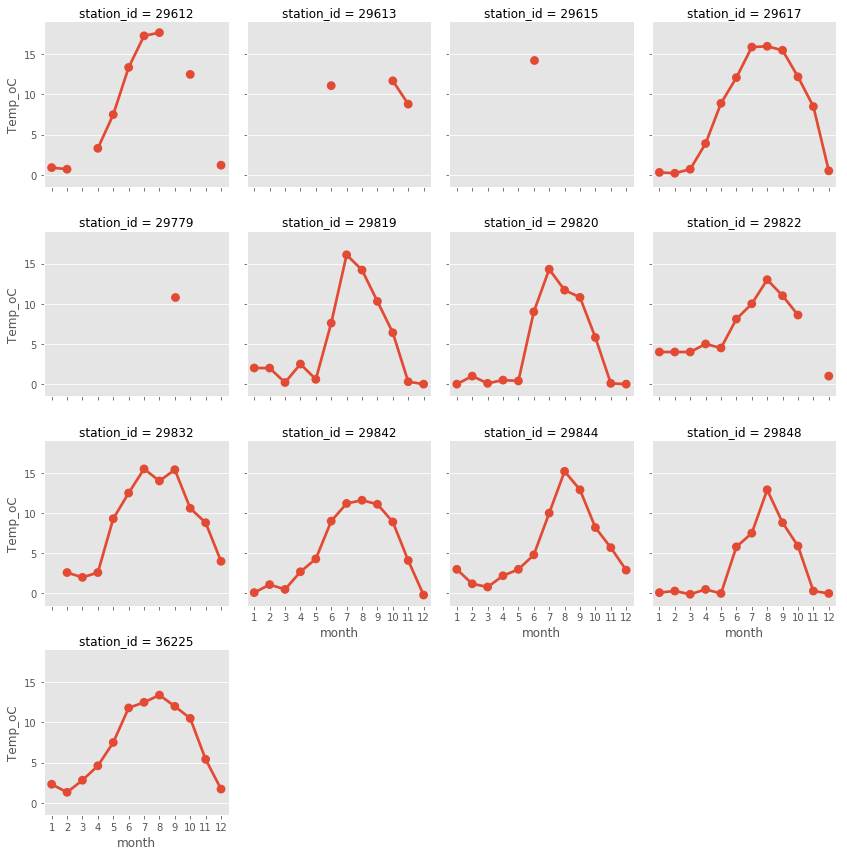

In [6]:
# Plot monthly means
sn.catplot(x='month', 
           y='Temp_oC', 
           data=mon_df, 
           col='station_id',  
           col_wrap=4, 
           kind='point', 
           height=3)

# Save
out_path = (r'C:\Data\James_Work\Staff\Oeyvind_K\Elveovervakingsprogrammet'
            r'\Data\temperature_data\temp_2017-18\other\temps_manual_2017.png')
plt.savefig(out_path, dpi=300)

Based on this plot, there are 7 sites in 2017 with at least one manual measurement per month. These are listed in the table at the start of this notebook. Get just the data for these sites.

In [7]:
# Pivot
man_df = mon_df.pivot(index='station_id', 
                      columns='month', 
                      values='Temp_oC')
man_df

month,1,2,3,4,5,6,7,8,9,10,11,12
station_id,,,,,,,,,,,,
29612,0.90,0.7,NaN,3.3,7.5,13.366667,17.3,17.7,NaN,12.5,NaN,1.2
29613,NaN,NaN,NaN,NaN,NaN,11.100000,NaN,NaN,NaN,11.7,8.8,NaN
29615,NaN,NaN,NaN,NaN,NaN,14.300000,NaN,NaN,NaN,NaN,NaN,NaN
29617,0.30,0.2,0.7,3.9,8.9,12.100000,15.9,16.0,15.5,12.2,8.5,0.5
29779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.9,NaN,NaN,NaN
29819,2.01,2.0,0.2,2.5,0.6,7.600000,16.1,14.2,10.3,6.4,0.3,0.0
29820,0.00,1.0,0.1,0.5,0.4,9.000000,14.3,11.7,10.8,5.8,0.1,0.0
29822,4.00,4.0,4.0,5.0,4.5,8.100000,10.0,13.0,11.0,8.6,NaN,1.0
29832,NaN,2.6,2.0,2.6,9.3,12.500000,15.5,14.0,15.4,10.6,8.8,4.0


## 2. TinyTag data

The TinyTags are swapped during the year, so we need to splice two series together at each site. Liv Bente's spreadsheet here:

K:\Prosjekter\Ferskvann\16384 Elveovervåkingsprogrammet\2018\4. Data\6. Vanntemperatur\Grunnprogrammet\1. TinyTag tempsensorer\1. Oversikt inn ut setting templogger RID hoved 2014-15-16-17-18_lbs.xlsx

lists the dates when loggers were changed.

In [8]:
# Dates from Liv Bente's spreadsheet
swap_dates = {29615:['Numedalslagen', '2017-07-03 10:15'],
              29613:['Skienselva', '2017-07-06 13:30'],
              29614:['Otra', '2017-07-03 08:20'],
              29783:['Orreelva', '2017-07-04 08:50'],
              29821:['Vosso', '2017-07-03 11:40'],
              29782:['Vefsna', '2017-09-21 11:30'],
              29779:['Altaelva', '2017-09-15 11:35']}

# TinyTag data (with tidied file names)
data_fold = (r'C:\Data\James_Work\Staff\Oeyvind_K\Elveovervakingsprogrammet'
             r'\Data\temperature_data\temp_2017-18\tiny_tag')

# Year of interest
year = 2017

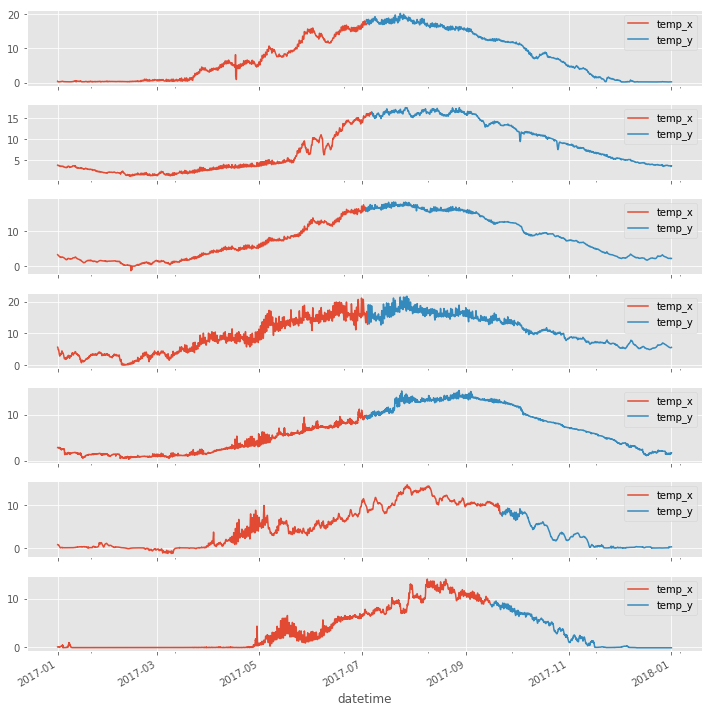

In [9]:
# Container for output
df_list = []

# Setup plot
fig, axes = plt.subplots(nrows=7, ncols=1, 
                         figsize=(10,10), 
                         sharex=True)

# Loop over stations
for idx, stn_id in enumerate(swap_dates.keys()):
    # Get stn
    stn = swap_dates[stn_id][0]
    
    # Get data paths
    path_17 = os.path.join(data_fold, u'%s_2016-17.txt' % stn)
    path_18 = os.path.join(data_fold, u'%s_2017-18.txt' % stn)

    # Parse series 1
    df_17 = pd.read_csv(path_17, 
                        delim_whitespace=True, 
                        skiprows=2, 
                        names=['date', 'time', 'temp'], 
                        decimal=',')
    df_17['datetime'] = df_17['date'] + ' ' + df_17['time']
    df_17['datetime'] = pd.to_datetime(df_17['datetime'], 
                                       format='%d.%m.%Y %H.%M.%S,%f')
    df_17.set_index('datetime', inplace=True)
    del df_17['date'], df_17['time']

    # Parse series 2
    df_18 = pd.read_csv(path_18, 
                        delim_whitespace=True, 
                        skiprows=2, 
                        names=['date', 'time', 'temp'], 
                        decimal=',')
    df_18['datetime'] = df_18['date'] + ' ' + df_18['time']
    df_18['datetime'] = pd.to_datetime(df_18['datetime'], 
                                       format='%d.%m.%Y %H.%M.%S,%f')
    df_18.set_index('datetime', inplace=True)
    del df_18['date'], df_18['time']

    # Get date logger changed
    swap_dt = pd.to_datetime(swap_dates[stn_id][1])
    swap_dt_plus1 = swap_dt + pd.DateOffset(hours=3) # Skip 3 hrs to allow time for re-equilibration
    
    # Truncate series 1
    df_17 = df_17.truncate(before='%s-01-01 00:00' % year,
                           after=swap_dt)
    
    # Truncate series 2
    df_18 = df_18.truncate(before=swap_dt_plus1,
                           after='%s-12-31 23:59' % year)    

    # Combine
    df = pd.merge(df_17, df_18, how='outer', 
                  left_index=True, right_index=True)
    
    # Plot
    df.plot(ax=axes[idx])
    
    # Concat to single series
    df = pd.concat([df_17, df_18], axis=0, sort=True)

    # Monthly avgs.
    df = df.resample('M').mean()
    
    # Add to output
    df['station_id'] = stn_id
    df_list.append(df)

plt.tight_layout()

In [10]:
# Combine results
df = pd.concat(df_list, axis=0, sort=True)
df.columns = ['station_id', 'Temp_oC']
df['month'] = df.index.month
df.reset_index(inplace=True)
tt_df = df.pivot(index='station_id', 
                 columns='month', 
                 values='Temp_oC')
tt_df

month,1,2,3,4,5,6,7,8,9,10,11,12
station_id,,,,,,,,,,,,
29613,2.995228,1.781414,2.157376,3.493972,5.481667,11.466792,16.037868,16.330914,14.098792,10.433141,6.938694,4.377970
29614,1.795753,0.757411,1.883459,4.890153,8.331411,13.779208,17.149986,16.212460,13.488125,9.134282,5.159819,2.457581
29615,0.284637,0.410298,1.452921,5.042153,9.868199,14.407250,18.066181,16.519449,12.863153,7.926148,2.437750,0.221142
29779,0.007782,-0.047307,-0.036124,0.089806,2.436290,4.745764,8.178185,11.573522,9.156165,5.113342,0.733792,-0.043226
29782,0.281129,-0.065104,-0.256231,2.821472,4.646263,6.572500,11.069032,12.079073,9.545712,4.851678,1.165889,0.073441
29783,2.978683,1.977098,4.809421,8.288403,13.299315,15.779931,16.885749,16.425470,14.282514,10.479651,7.448306,5.867030
29821,1.551949,0.929063,1.259879,2.940375,5.632836,7.962472,11.381444,13.440188,13.004056,8.980805,5.742778,2.354207


## 3. Rolf's logger

In [11]:
# Read raw data
in_xlsx = (r'C:\Data\James_Work\Staff\Oeyvind_K\Elveovervakingsprogrammet'
           r'\Data\temperature_data\temp_2017-18\other\vegårdselva.xlsx')
df = pd.read_excel(in_xlsx, sheet_name='Lundevann-Storelva')
df.set_index('Date', inplace=True)

# Resample
df = df.resample('M').mean()

# Tidy
df.columns = ['Temp_oC']
df['month'] = df.index.month
df.reset_index(inplace=True)
del df['Date']
df['station_id'] = 30019

ro_df = df.pivot(index='station_id', 
                 columns='month', 
                 values='Temp_oC')

ro_df

month,1,2,3,4,5,6,7,8,9,10,11,12
station_id,,,,,,,,,,,,
30019,1.458091,2.940774,4.271626,8.090833,14.559865,17.911516,20.91326,19.115282,15.291708,11.038992,6.53,3.222334


## 4. NVE data

In [12]:
# Dict mapping NVE temp codes to RESA IDs
stn_id_dict = {'2_1087':29617,
               '12_298':29612,
               '15_115':29615,
               '16_207':29613,
               '21_79':29614,
               '27_29':29832,
               '38_2':29837,
               '62_30':29821,
               '84_23':29842,
               '121_62':29778,
               '151_32':29782,
               '246_11':29819}

# Data folder
data_fold = (r'C:\Data\James_Work\Staff\Oeyvind_K\Elveovervakingsprogrammet'
             r'\Data\temperature_data\temp_2017-18\hydra-ii')

# List for data
df_list = []

# Loop over sites
for stn_cd in stn_id_dict.keys():
    # Read data
    file_path = os.path.join(data_fold, '%s.txt' % stn_cd)
    df = pd.read_csv(file_path, skiprows=2, names=['date', 'Temp_oC'], na_values=-9999)
    df['date'] = pd.to_datetime(df['date'], 
                                format='%Y.%m.%d %H:%M')
    df.set_index('date', inplace=True)
    
    # Resample
    df = df.resample('M').mean()
    
    # Convert index to month
    df.index = df.index.month
    df.index.name = 'month'
    
    # Change column to site id
    df.columns = [stn_id_dict[stn_cd], ]
    
    # Transpose and append
    df_list.append(df.T)

# Combine
nve_df = pd.concat(df_list, axis=0, sort=True)
nve_df.index.name = 'station_id'
nve_df

month,1,2,3,4,5,6,7,8,9,10,11,12
station_id,,,,,,,,,,,,
29617,0.605806,0.439231,1.684194,4.391667,8.590000,12.457667,16.866774,15.740323,13.231333,9.040000,4.560769,NaN
29612,1.220645,0.871429,1.746452,3.690667,7.570000,12.226667,17.663871,16.864516,14.136000,9.464516,5.048667,2.040645
29615,0.003333,0.015000,1.203793,4.507333,9.273548,13.577000,17.124516,15.882258,12.431333,7.888846,NaN,NaN
29613,3.213871,1.881786,2.125484,3.320333,5.122903,11.221000,15.928387,16.208065,14.119000,10.600000,7.328667,4.692581
29614,1.823871,0.814286,1.883226,4.843000,8.252903,13.735667,17.090000,16.197742,13.495667,9.162581,6.141500,NaN
29832,3.701935,2.332500,3.226452,4.741667,7.970323,11.756667,14.349032,14.183871,13.331000,9.792903,6.861000,4.510645
29837,2.498065,1.542500,2.640323,4.326667,9.332258,12.652667,14.811290,13.824839,12.867333,9.195806,5.606000,3.021613
29821,1.509032,0.703571,1.448333,3.337000,6.161290,8.276667,12.325161,13.214194,12.597667,8.669677,5.321333,2.197097
29842,0.874839,0.477857,1.044194,3.471667,6.470323,9.503000,13.443548,13.146774,11.447333,7.465484,2.619000,0.532258


## Combine

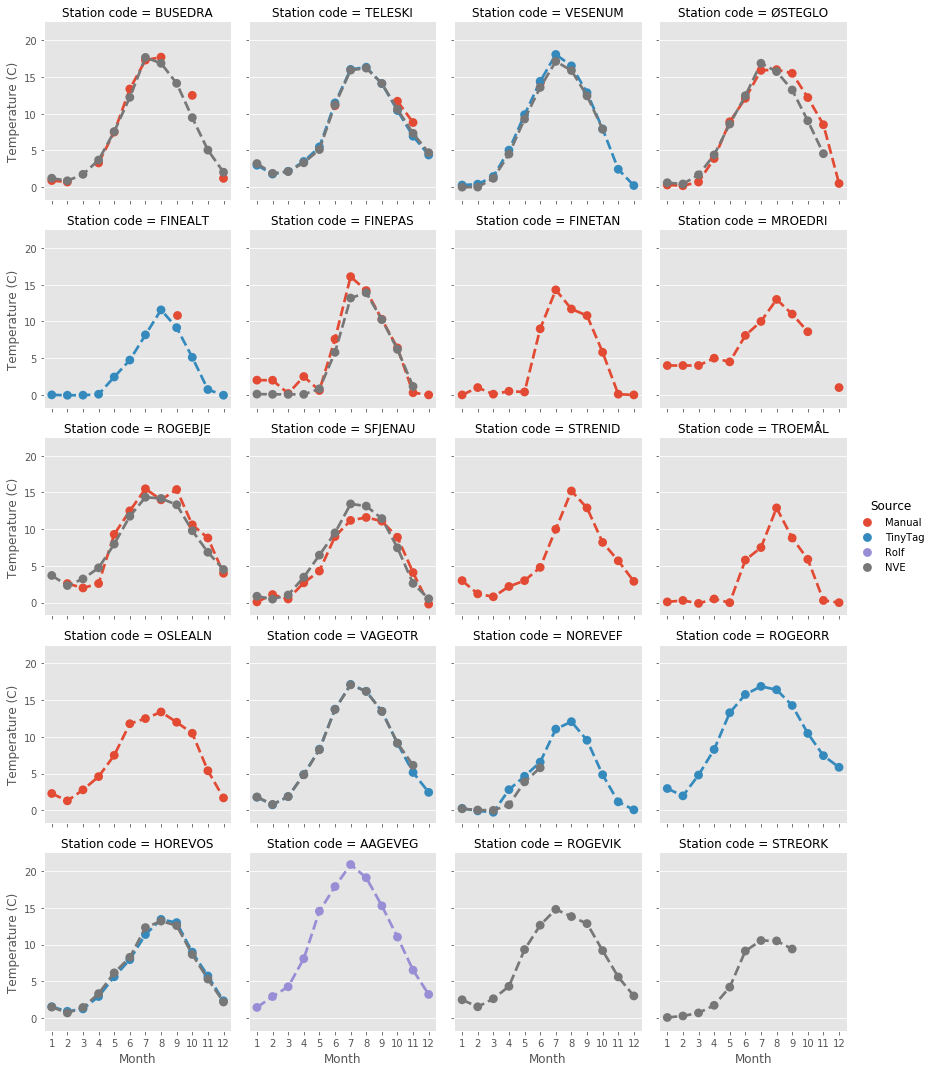

In [13]:
# Melt all and combine
# RESA
man_df2 = man_df.reset_index().melt(id_vars='station_id')
man_df2['source'] = 'Manual'

# TinyTag
tt_df2 = tt_df.reset_index().melt(id_vars='station_id')
tt_df2['source'] = 'TinyTag'

# Rolf
ro_df2 = ro_df.reset_index().melt(id_vars='station_id')
ro_df2['source'] = 'Rolf'

# NVE
nve_df2 = nve_df.reset_index().melt(id_vars='station_id')
nve_df2['source'] = 'NVE'

# Combine
df = pd.concat([man_df2, tt_df2, ro_df2, nve_df2], axis=0, sort=True)

# Join stn codes
df = pd.merge(df, 
              stn_df[['station_id', 'station_code']], 
              how='left', 
              on='station_id')
del df['station_id']
df.columns = ['Month', 'Source', 'Temperature (C)', 'Station code']

# Plot
sn.catplot(x='Month', 
           y='Temperature (C)', 
           data=df, 
           hue='Source', 
           col='Station code', 
           col_wrap=4, 
           height=3, 
           linestyles=['--', '--', '--', '--'],
           kind='point')

# Save
out_path = (r'C:\Data\James_Work\Staff\Oeyvind_K\Elveovervakingsprogrammet'
            r'\Data\temperature_data\temp_2017-18\temps_all_sources_2017.png')
plt.savefig(out_path, dpi=300)

## 5. Extract sinlge series per site and write table

Based on the plot above, it looks as though all datasets generally agree wherever there is overlap. In the code below, I've chosen one dataset per station to represent the values in tabular form.

In [14]:
# Choose the best series for each sites from plot above
man_stns = [29617, 36225, 29822, 29844, 29848, 29820, 29819]
nve_stns = [29612, 29832, 29837, 29842, 29778]
tt_stns = [29615, 29613, 29614, 29783, 29821, 29782, 29779]

# Get data for chosen stations
man_df = man_df[man_df.index.isin(man_stns)]
nve_df = nve_df[nve_df.index.isin(nve_stns)]
tt_df = tt_df[tt_df.index.isin(tt_stns)]

# Combine
df = pd.concat([man_df, nve_df, tt_df, ro_df], axis=0, sort=True)
df.reset_index(inplace=True)

# Join station details
df = pd.merge(df, stn_df, how='left', on='station_id')

# Reorder
df = df[['station_id', 'station_code', 'station_name', 'latitude', 'longitude', 'altitude']+list(range(1,13))]
del df['latitude'], df['longitude'], df['altitude']

# Save output
out_csv = (r'C:\Data\James_Work\Staff\Oeyvind_K\Elveovervakingsprogrammet'
           r'\Data\temperature_data\temp_2017-18\monthly_avg_temps_2017-18.csv')
df.to_csv(out_csv, encoding='utf-8', index=False)

df

,station_id,station_code,station_name,1,2,3,4,5,6,7,8,9,10,11,12
0,29617,ØSTEGLO,Glomma ved Sarpsfoss,0.300000,0.200000,0.700000,3.900000,8.900000,12.100000,15.900000,16.000000,15.500000,12.200000,8.500000,0.500000
1,29819,FINEPAS,Pasvikelva,2.010000,2.000000,0.200000,2.500000,0.600000,7.600000,16.100000,14.200000,10.300000,6.400000,0.300000,0.000000
2,29820,FINETAN,Tanaelva,0.000000,1.000000,0.100000,0.500000,0.400000,9.000000,14.300000,11.700000,10.800000,5.800000,0.100000,0.000000
3,29822,MROEDRI,Driva,4.000000,4.000000,4.000000,5.000000,4.500000,8.100000,10.000000,13.000000,11.000000,8.600000,NaN,1.000000
4,29844,STRENID,Nidelva (Tr.heim),3.000000,1.200000,0.800000,2.200000,3.000000,4.800000,10.000000,15.200000,12.900000,8.200000,5.700000,2.900000
5,29848,TROEMÅL,Målselv,0.100000,0.300000,-0.100000,0.500000,0.000000,5.800000,7.500000,12.900000,8.800000,5.900000,0.300000,0.000000
6,36225,OSLEALN,Alna,2.300000,1.300000,2.800000,4.600000,7.500000,11.800000,12.500000,13.400000,12.000000,10.500000,5.400000,1.700000
7,29612,BUSEDRA,Drammenselva,1.220645,0.871429,1.746452,3.690667,7.570000,12.226667,17.663871,16.864516,14.136000,9.464516,5.048667,2.040645
8,29832,ROGEBJE,Bjerkreimselva,3.701935,2.332500,3.226452,4.741667,7.970323,11.756667,14.349032,14.183871,13.331000,9.792903,6.861000,4.510645
9,29837,ROGEVIK,Vikedalselva,2.498065,1.542500,2.640323,4.326667,9.332258,12.652667,14.811290,13.824839,12.867333,9.195806,5.606000,3.021613
